# NeurIPS 2021 Submission 4400
# A Normative and Biologically Plausible Algorithm for Independent Component Analysis
## Fig.1 Panel A. 
### Notebook for visualizing the intuition and procedure for extracting higher-order moments from weighted whitened data

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kurtosis
from scipy import signal
import scipy
from sklearn.decomposition import FastICA, PCA


# function to generate nonsingular random matrix for mixing
def random_nonsingular_matrix(d=4):
    """
    Generates a random nonsingular (invertible) matrix if shape d*d
    """
    epsilon = 0.1
    A = np.random.rand(d, d)
    while abs(np.linalg.det(A)) < epsilon:
        A = np.random.rand(d, d)
    return A

#FOBI procedure described in Section 2.1

def ICA_by_PCA(X):
    Xcov = (X.T@X) 
    d,V = np.linalg.eig(Xcov) 
    D = np.diag(1./np.sqrt(d+0.0)) 
    W = V@D@V.T
    Xwhiten = (X@W.T).T

    nonlin_Z = np.sqrt(sum(Xwhiten*Xwhiten))*Xwhiten
    d_Z,V_Z = np.linalg.eig(nonlin_Z@nonlin_Z.T) 
    Z_ICA_PCA = (Xwhiten.T@V_Z).T
    return Z_ICA_PCA

In [42]:
# Generate sample data
#np.random.seed()
n_samples = 500000
time = np.linspace(0, 4, n_samples)

Period_Signal= [1, 4, 2]
s1 = np.sin(2*np.pi * time* Period_Signal[0])  # Signal 1 : sinusoidal signal
s1 = s1 - s1.mean()
s2 = signal.sawtooth(2 * np.pi * Period_Signal[1]* time)  # Signal 3: saw tooth signal
s2 = s2 - s2.mean()


perm_s1= np.random.permutation(n_samples)
perm_s2= np.random.permutation(n_samples)

S = np.c_[s1[perm_s1], s2[perm_s2]]

print('The kurtosis of the data considered are', kurtosis(S, fisher=False))
S += 0.002 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data

# Mix data
# uncomment the line below to generate any random nonsigular matrix 
#A = random_nonsingular_matrix(d=S.shape[1]) # Mixing matrix
# Matrix used in for Fig.1.A and reported in the supplementary material
A= np.array([[0.10054428 ,0.81736508],
             [0.75216771,0.44640104]])


X = np.dot(S, A.T)  # Generate observations

Z_ICA_PCA = ICA_by_PCA(X) # Reconstruct signals based on ICA_PCA


The kurtosis of the data considered are [1.500003 1.8     ]


In [43]:
# Compute covariance of the observed signal and Eigen-decomposition
Xcov = (X.T@X) 
d,V = np.linalg.eig(Xcov) 

# Whiten the data
D = np.diag(1./np.sqrt(d+0.0)) 
W_whitening = V@D@V.T
Xwhiten = (X@W_whitening.T).T

# Create the weighted data. 
nonlin_Z = np.sqrt(sum(Xwhiten*Xwhiten))*Xwhiten
d_Z,V_Z = np.linalg.eig(nonlin_Z@nonlin_Z.T) 

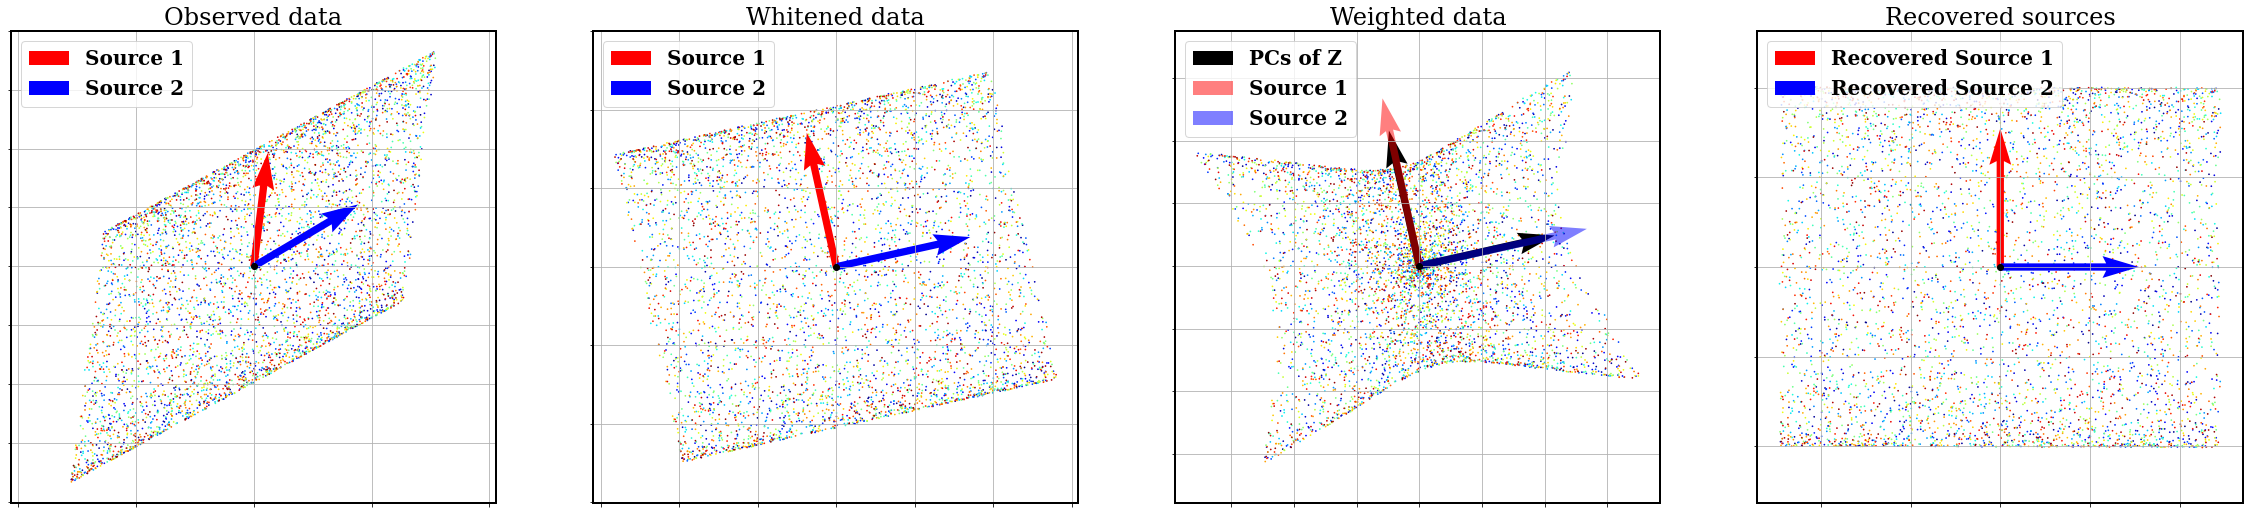

In [45]:
# # Creating figure

import matplotlib.cm as cm

n_subsamples=5000
c = np.linspace(0, 10, n_subsamples-1)
cmap = cm.jet

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   :  20}

plt.rc('font',**font)#, family='serif'

fig = plt.figure(figsize = (40, 40))
d_dim_plot=4

## Mixture panel Fig.1.A(i)
    
ax = fig.add_subplot(d_dim_plot, d_dim_plot, d_dim_plot+d_dim_plot+1)
# Creating plot
ax.scatter(X[1:n_subsamples,0], X[1:n_subsamples,1],s=0.5,c=c, cmap=cmap) #, color = "green"
#plt.title("simple 3D scatter plot")

pos_vec=[0,0]
ax.quiver(pos_vec[0], pos_vec[1], A[0,0], A[0,1], color='r',scale=3.5,width=0.015,label='Source 1')
ax.quiver(pos_vec[0], pos_vec[1],  A[1,0], A[1,1], color='b',scale=3.5,linewidth=10,width=0.015,label='Source 2')

plt.plot(0,0,'ok') 
plt.axis('equal') 
plt.grid(b=True, which='major')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(2)

plt.legend()
plt.title('Observed data')

## Mixture whitened data panel Fig.1.A(ii)

ax = fig.add_subplot(d_dim_plot, d_dim_plot, d_dim_plot+d_dim_plot+2)
ax.scatter(Xwhiten.T[1:n_subsamples,0], Xwhiten.T[1:n_subsamples,1],s=0.5,c=c, cmap=cmap) 

pos_vec=[0,0]
ax.quiver(pos_vec[0], pos_vec[1], (W_whitening@A)[0,0], (W_whitening@A)[0,1], color='r',scale=0.005,width=0.015,label='Source 1')
ax.quiver(pos_vec[0], pos_vec[1],  (W_whitening@A)[1,0], (W_whitening@A)[1,1], color='b',scale=0.005,width=0.015,label='Source 2')

plt.plot(0,0,'ok')
plt.axis('equal')  
plt.grid(b=True, which='major') 

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(2)

plt.title('Whitened data')
plt.legend()


## Mixture weighted data panel Fig.1.A(iii)

ax = fig.add_subplot(d_dim_plot, d_dim_plot, d_dim_plot+d_dim_plot+3)
ax.scatter(nonlin_Z.T[1:n_subsamples,0], nonlin_Z.T[1:n_subsamples,1],s=0.5,c=c, cmap=cmap) #, color = "green"

pos_vec=[0,0]
ax.quiver(pos_vec[0], pos_vec[1], (V_Z.T)[0,0], (V_Z.T)[0,1], color='k',scale=3.5,label='PCs of Z',width=0.015)
ax.quiver(pos_vec[0], pos_vec[1],  (V_Z.T)[1,0],  (V_Z.T)[1,1], color='k',scale=3.5,width=0.015)

pos_vec=[0,0]
ax.quiver(pos_vec[0], pos_vec[1], (W_whitening@A)[0,0], (W_whitening@A)[0,1], color='r',scale=0.004,width=0.015,alpha=0.5,label='Source 1')
ax.quiver(pos_vec[0], pos_vec[1],  (W_whitening@A)[1,0], (W_whitening@A)[1,1], color='b',scale=0.004,width=0.015,alpha=0.5,label='Source 2')

plt.plot(0,0,'ok') 
plt.axis('equal')  
plt.grid(b=True, which='major') 

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(2)

plt.title('Weighted data')
plt.legend()


## Recovered sources panel Fig.1.A(iv)

ax = fig.add_subplot(d_dim_plot, d_dim_plot, d_dim_plot+d_dim_plot+4)
ax.scatter(Z_ICA_PCA.T[1:n_subsamples,0], Z_ICA_PCA.T[1:n_subsamples,1],s=0.5,c=c, cmap=cmap) #, color = "green"

M = np.array([[0,1],[1,0]])
pos_vec=[0,0]
ax.quiver(pos_vec[0], pos_vec[1], M[0,0], M[0,1], color='r',scale=3.5,width=0.015,label='Recovered Source 1')
ax.quiver(pos_vec[0], pos_vec[1],  M[1,0], M[1,1], color='b',scale=3.5,width=0.015,label='Recovered Source 2')


plt.plot(0,0,'ok') 
plt.axis('equal')  
plt.grid(b=True, which='major')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(2)

plt.legend(loc='upper left')
plt.title('Recovered sources')
plt.show()
